## Assignmnet 1 Classification

# class 1 vs class 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class1 = np.loadtxt(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\Class1.txt")
class2 = np.loadtxt(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\Class2.txt")
class3 = np.loadtxt(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\Class3.txt")

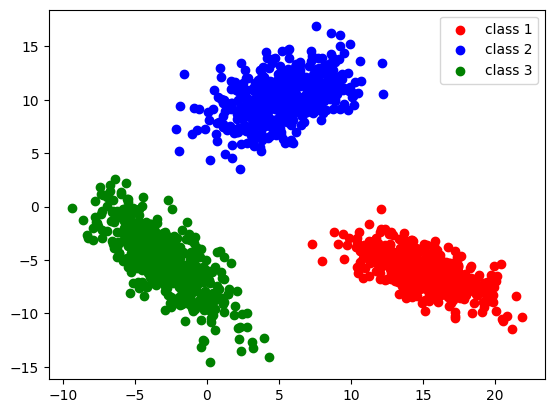

In [3]:
plt.scatter(class1[:,0],class1[:,1],color = 'r',label = "class 1")
plt.scatter(class2[:,0],class2[:,1],color = 'b',label = "class 2")
plt.scatter(class3[:,0],class3[:,1],color = 'g',label = "class 3")
plt.legend()
plt.show()

In [4]:
def binary_data_class_maker(class_A , class_B): # class A  will have label as 1 , unlike class B will have label as 0
    class_A_label = np.insert(class_A , 2,0 , axis= 1)
    class_B_label = np.insert(class_B , 2,1 , axis= 1)
    return class_A_label , class_B_label    

In [5]:
def sigmoidal_function(activation_value): # it will restrict the output from it inbetween 0 to 1.
    f = 1/(1 + np.exp(-activation_value))
    return f


In [6]:
np.random.seed(42)

In [7]:
def predict(input_x , weights , bias):
    p = np.dot(input_x , weights) + bias
    a = sigmoidal_function(p)
    return a


In [8]:
class_1_with_label  , class_2_with_label = binary_data_class_maker(class1 , class2)


class_1_2_data  = np.concatenate((class_1_with_label  , class_2_with_label), axis= 0)


np.random.shuffle(class_1_2_data)

# Splitting the data

split = int(len(class_1_2_data)*0.7)

train_1_2 = class_1_2_data[ :split]
test_1_2 = class_1_2_data[split : ]

In [9]:
weights = np.random.randn(2)*0.01 # shape: (2,)
weights

array([-0.00601969,  0.00760251])

In [ ]:
# training on class 1 v/s class2 



eta = 0.01
Epoches  = 20
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_1_2 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights = weights + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss")
plt.show()
    


In [11]:
# i want to draw the confusion matrix

test_1_2.shape


(300, 3)

In [12]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_1_2:
    prediction = np.dot(weights.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        159    |     0
       ________|_________ 
               |
        0      |     141




In [13]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 100 %
precision is 100.0
recall is 1.0


In [14]:
# to plot the curve showing the boundary 
x1_test = []
x2_test = []
label = []
for i in test_1_2:
    x1_test.append(i[0])
    x2_test.append(i[1])
    label.append(i[2])

    

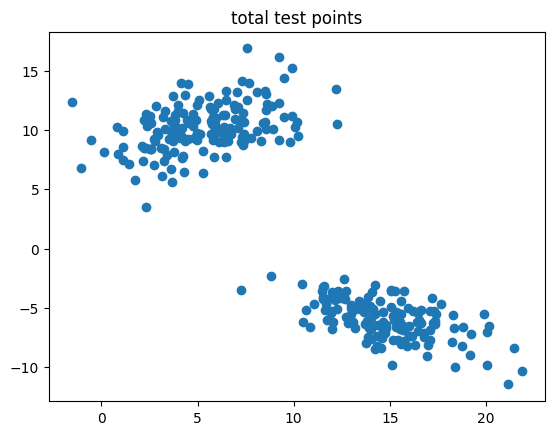

In [15]:
plt.scatter(x1_test,x2_test)
plt.title("total test points")
plt.show()

# now we have to draw a decsision boundary inbetweeen them .

In [16]:
x_values_1_2 = np.linspace(np.min(x1_test),np.max(x1_test), 20)
# x_values
y_values_1_2= -(weights[0]/weights[1])*x_values_1_2
# y_values_1_2

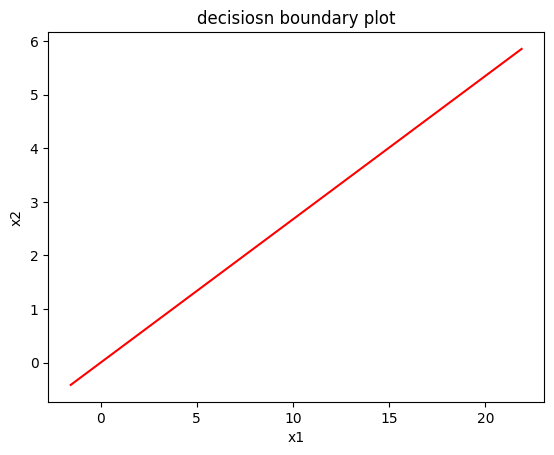

In [17]:
plt.plot(x_values_1_2,y_values_1_2 , color ='r')
plt.title("decisiosn boundary plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

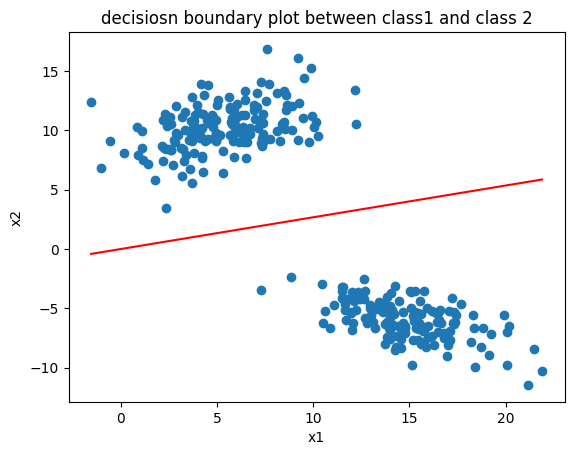

In [18]:
# combining both the graphs

plt.scatter(x1_test,x2_test)
plt.plot(x_values_1_2,y_values_1_2 , color ='r')
plt.title("decisiosn boundary plot between class1 and class 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Class 1 v/s Class 3

In [19]:
class_1_with_label  , class_3_with_label = binary_data_class_maker(class1 , class3)


class_1_3_data  = np.concatenate((class_1_with_label  , class_3_with_label), axis= 0)


np.random.shuffle(class_1_3_data)

# Splitting the data

split = int(len(class_1_3_data)*0.7)

train_1_3 = class_1_3_data[ :split]
test_1_3 = class_1_3_data[split : ]

In [20]:
weights_1_3 = np.random.randn(2)*0.01 # shape: (2,)
weights_1_3

array([ 0.00503816, -0.02153879])

In [ ]:
# training on class 1 v/s class2 



eta = 0.01
Epoches  = 20
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_1_3 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights_1_3.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights_1_3 = weights_1_3 + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss class1 v/s class 3")
plt.show()
    


In [22]:
weights_1_3

array([-0.73830417, -0.66259354])

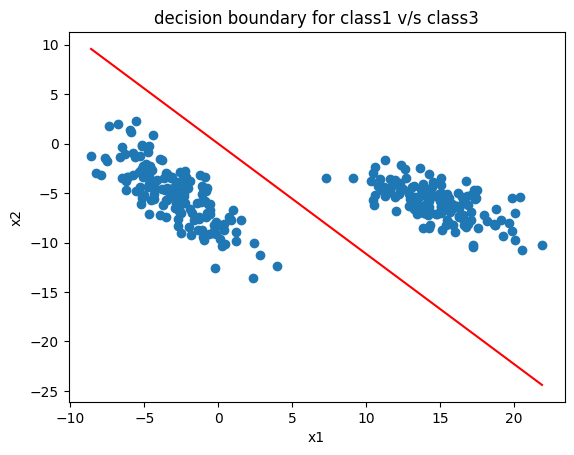

In [23]:
x_val = []
y_val = []
for i in test_1_3:
    x_val.append(i[0])
    y_val.append(i[1])

plt.scatter(x_val,y_val)

# for boundary line

x_values_1_3 = np.linspace(np.min(x_val) , np.max(x_val) , 100)
y_values_1_3 = -(weights_1_3[0]/weights_1_3[1])*x_values_1_3

plt.plot(x_values_1_3,y_values_1_3,color = 'r')
plt.title("decision boundary for class1 v/s class3")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()




In [24]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_1_3:
    prediction = np.dot(weights_1_3.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        153    |     0
       ________|_________ 
               |
        0      |     147




In [25]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 100 %
precision is 100.0
recall is 1.0


# Class 2 v/s Class 3


In [26]:
class_2_with_label  , class_3_with_label = binary_data_class_maker(class2 , class3)


class_2_3_data  = np.concatenate((class_2_with_label  , class_3_with_label), axis= 0)


np.random.shuffle(class_2_3_data)

# Splitting the data

split = int(len(class_2_3_data)*0.7)

train_2_3 = class_2_3_data[ :split]
test_2_3 = class_2_3_data[split : ]

In [27]:
weights_2_3 = np.random.randn(2)*0.01 # shape: (2,)
weights_2_3

array([ 0.0011327 , -0.01438278])

In [ ]:
# training on class 1 v/s class2 



eta = 0.01
Epoches  = 20
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_2_3 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights_2_3.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights_2_3 = weights_2_3 + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss class 2 v/s class 3")
plt.show()
    


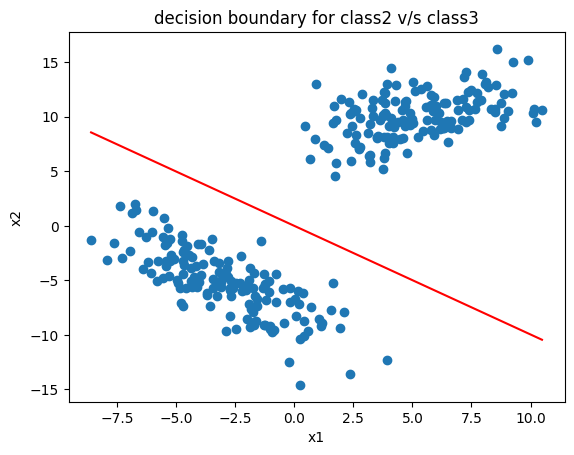

In [29]:
x_val = []
y_val = []
for i in test_2_3:
    x_val.append(i[0])
    y_val.append(i[1])

plt.scatter(x_val,y_val)

# for boundary line

x_values_2_3 = np.linspace(np.min(x_val) , np.max(x_val) , 100)
y_values_2_3 = -(weights_2_3[0]/weights_2_3[1])*x_values_2_3

plt.plot(x_values_2_3,y_values_2_3,color = 'r')
plt.title("decision boundary for class2 v/s class3")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()




In [30]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_2_3:
    prediction = np.dot(weights_2_3.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        150    |     0
       ________|_________ 
               |
        0      |     150




In [31]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 100 %
precision is 100.0
recall is 1.0


In [32]:
# creating vote system , so that one which got highest vote will win the match

class_1_2_3_data  = np.concatenate((class1  , class2  ,class3), axis= 0)
class_1_2_3_data.shape

(1500, 2)

In [33]:
print(f'''
weights for class 1 v/s class 2 {weights}
weights for class 1 v/s class 3 {weights_1_3}
weights for class 2 v/s class 3 {weights_2_3}
''')


weights for class 1 v/s class 2 [-0.18706118  0.69960844]
weights for class 1 v/s class 3 [-0.73830417 -0.66259354]
weights for class 2 v/s class 3 [-0.69192518 -0.69458122]



In [34]:
class_1_label = np.insert(class1 , 2,1 , axis= 1)
class_2_label = np.insert(class2 , 2,2 , axis= 1)
class_3_label = np.insert(class3 , 2,3 , axis= 1)

class_1_2_3_data  = np.concatenate((class_1_label  , class_2_label  ,class_3_label), axis= 0)
np.random.shuffle(class_1_2_3_data)
class_1_2_3_data.shape

(1500, 3)

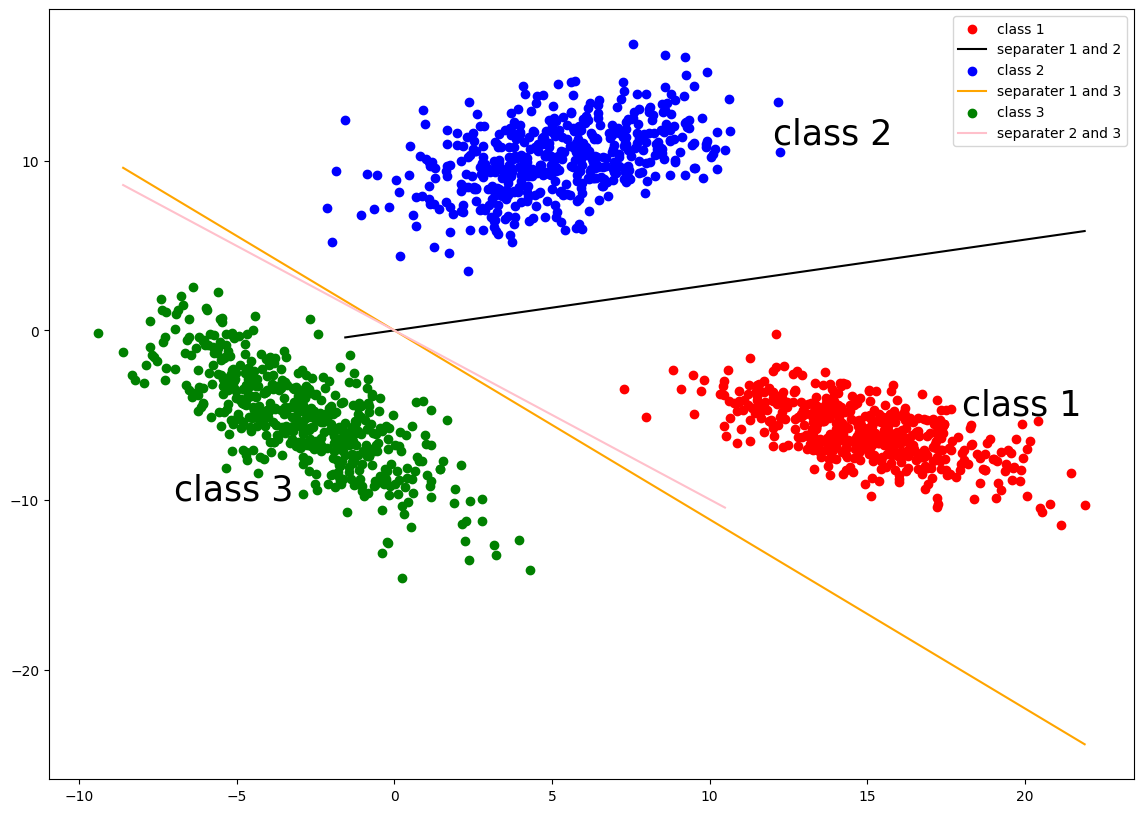

In [35]:
plt.figure(figsize=(14 ,10))
plt.scatter(class1[:,0],class1[:,1],color = 'r',label = "class 1")
plt.plot(x_values_1_2,y_values_1_2,color = 'black',label= "separater 1 and 2" )
plt.scatter(class2[:,0],class2[:,1],color = 'b',label = "class 2")
plt.plot(x_values_1_3,y_values_1_3,color = 'orange',label= "separater 1 and 3")
plt.scatter(class3[:,0],class3[:,1],color = 'g',label = "class 3")
plt.plot(x_values_2_3,y_values_2_3,color = 'pink',label= "separater 2 and 3")
plt.legend()
plt.text(18,-5,"class 1",fontsize=25)
plt.text(12,11,"class 2",fontsize=25)
plt.text(-7,-10,"class 3",fontsize=25)

plt.show()

In [36]:
# class_1_2_3_data

In [38]:

weights_1_2 = weights
class_1_prediction = []
class_2_prediction = []
class_3_prediction = []
np.random.shuffle(class_1_2_3_data)
for i in class_1_2_3_data:
    vote_board = {1:0 , 2:0 , 3:0}

    vote_1_2 = 2 if sigmoidal_function(np.dot(weights_1_2,i[0:2])) >= 0.5 else 1
    vote_1_3 = 3 if sigmoidal_function(np.dot(weights_1_3,i[0:2])) >= 0.5 else 1
    vote_2_3 = 3 if sigmoidal_function(np.dot(weights_2_3,i[0:2])) >= 0.5 else 2

    vote_board[vote_1_2] = vote_board[vote_1_2] + 1
    vote_board[vote_1_3] = vote_board[vote_1_3] + 1
    vote_board[vote_2_3] = vote_board[vote_2_3] + 1

    vote_max_class = max(vote_board, key = vote_board.get) # this function is really nice to help 

    if vote_max_class == 1 :
        class_1_prediction.append(i)
    elif vote_max_class == 2 :
        class_2_prediction.append(i)
    elif vote_max_class == 3 :
        class_3_prediction.append(i)         
    
    # print(f'''
    #      input vector is  is {i}
    #      vote 1_2 is {vote_1_2}
    #      vote 1_3 is {vote_1_3}
    #      vote 2_3 is {vote_2_3}

    #      vote board is {vote_board}
    #      class that go tmax votes {vote_max_class}

    #       ''')
    

In [ ]:
# so perfectly classified